* # Perceptron neural network

    * A perceptron is the simplest form of a neural network, specifically a single-layer neural network. 
    * It was introduced by Frank Rosenblatt in 1957. 
    * The perceptron is a binary classifier that takes multiple binary inputs and produces a single binary output.  
    * It's a fundamental building block for more complex neural networks.

In [29]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Load the Iris dataset
iris = load_iris()
# Extract petal length and petal width features from the dataset
X = iris.data[:, (2, 3)]  # petal length, petal width
# Create binary classification labels: 1 if Iris setosa, 0 otherwise
y = (iris.target == 0).astype(int)

# Create a Perceptron classifier with specified parameters
## max_iter is the maximum number of training iterations.
## tol is the tolerance, stopping training when the improvement is small.
## random_state ensures reproducibility by setting a random seed.
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
# Train the Perceptron on the dataset
per_clf.fit(X, y)
# Make a prediction for a new input [2, 0.5]
y_pred = per_clf.predict([[2, 0.5]])

* # Building an image classifire using TensorFlow and Keras

TensorFlow version is  2.10.0
Keras version is  2.10.0
The training set contains 60000 grayscale images, each 28*28 pixels
The first image in the training set is a Coat
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_78 (Dense)            (None, 300)               235500    
                                                                 
 dense_79 (Dense)            (None, 100)               30100     
                                                                 
 dense_80 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50

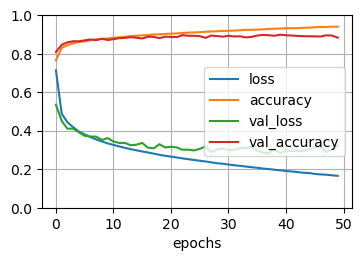

1/1 [==============================] - 0s 55ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
# First, let's import TensorFlow and Keras.
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Print TensorFlow and Keras versions.
print('TensorFlow version is ', tf.__version__)
print('Keras version is ', keras.__version__)

# Loading the fashion MNIST dataset.
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Get the shape of the training set.
(m, n1, n2) = X_train_full.shape
print(f"The training set contains {m} grayscale images, each {n1}*{n2} pixels")

# Split the training set into validation and training sets, and normalize pixel values.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Normalize pixel values in the test set.
X_test = X_test / 255.

# # plot an image using Matplotlib's `imshow()` function, with a 'binary' color map
# plt.imshow(X_train[0], cmap="binary")
# plt.axis('off')
# plt.show()

# Defining the corresponding class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Printing the class name of the first image in the training set
print(f"The first image in the training set is a {class_names[y_train[0]]}")

# Creating a Sequential model
model = keras.models.Sequential()
# Adding a Flatten layer to reshape the input images into a 1D array
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# Adding a Dense layer with 300 neurons and ReLU activation function
model.add(keras.layers.Dense(300, activation="relu"))
# Adding another Dense layer with 100 neurons and ReLU activation function
model.add(keras.layers.Dense(100, activation="relu"))
# Adding the output layer with 10 neurons (for each class) and softmax activation function
model.add(keras.layers.Dense(10, activation="softmax"))

# # Instead of adding the layers one by one as we just did, you can pass a list
# # of layers when creating the Sequential model
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

# Displaying a summary of the model architecture, including parameters and output shapes
model.summary()

# Plotting the model architecture and saving it as an image
# keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

# Accessing information about the layers in the model
model.layers
hidden1 = model.layers[1]# Retrieving information about the first hidden layer
hidden1.name# Retrieving the name of the first hidden layer

# Retrieving the weights and biases from the first hidden layer
weights, biases = hidden1.get_weights()
weights.shape# Displaying the shape of the weights
biases.shape# Displaying the shape of the biases

# Compiling the model with sparse categorical crossentropy loss,
# stochastic gradient descent (sgd) optimizer, and accuracy metric
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Training the model on the training data (X_train, y_train) for 30 epochs,
# with validation data provided (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

# Print the parameters used for model training
print(history.params)

# Print the available information in the training history
print(history.history.keys())

# Create a DataFrame with the training history and plot learning curves
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(4, 2.5))
plt.grid(True)
plt.xlabel('epochs')
plt.gca().set_ylim(0, 1)
plt.show()





model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)





